In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
#images to Tensors (0 to 1 range)
transform = transforms.ToTensor()

# Download and load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

#Loading data in batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),                   # Input: 28x28 → 784
            nn.Linear(784, 128),            # 1st layer
            nn.ReLU(),
            nn.Linear(128, 64),             # 2nd layer
            nn.ReLU(),
            nn.Linear(64, 10)               # Output: 10 classes
        )

    def forward(self, x):
        return self.model(x)


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #check gpu or cpu
model = MLP().to(device)

# Loss: CrossEntropyLoss for classification
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam (adaptive learning)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
for epoch in range(10):  #Number of epochs
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        #Forward pass
        outputs = model(images)
        #Calculate loss
        loss = criterion(outputs, labels)
        #backpropagation
        optimizer.zero_grad()
        loss.backward()
        #Update weights
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 309.3406
Epoch 2, Loss: 128.7249
Epoch 3, Loss: 87.4708
Epoch 4, Loss: 65.4210
Epoch 5, Loss: 51.6795
Epoch 6, Loss: 41.3186
Epoch 7, Loss: 33.3567
Epoch 8, Loss: 25.9102
Epoch 9, Loss: 23.9547
Epoch 10, Loss: 19.2772


In [8]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 97.57%


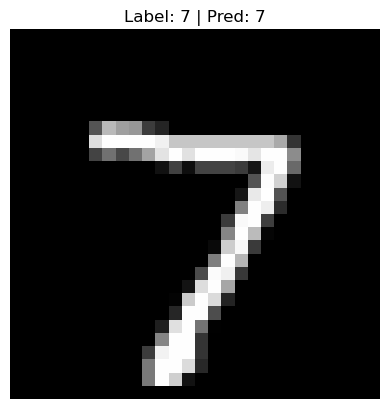

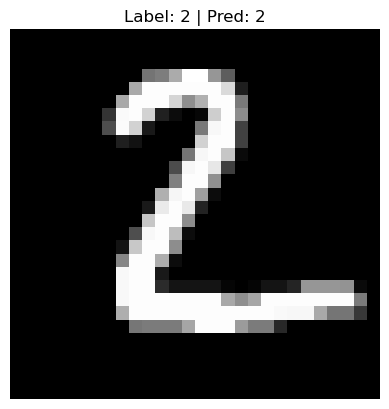

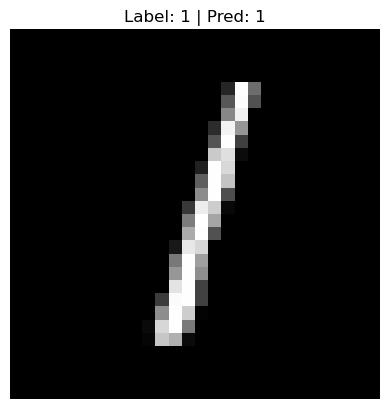

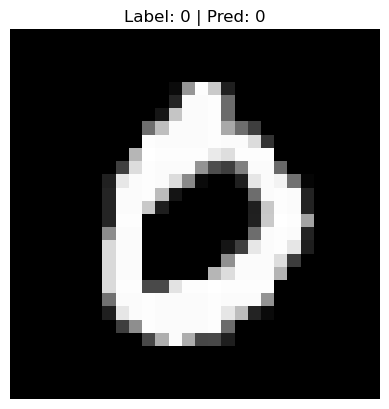

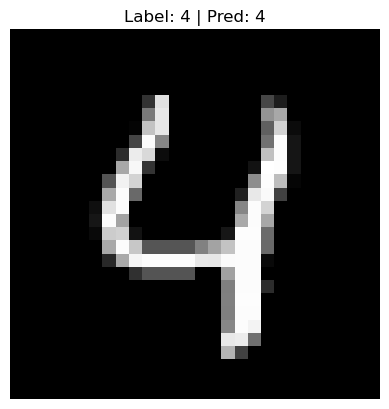

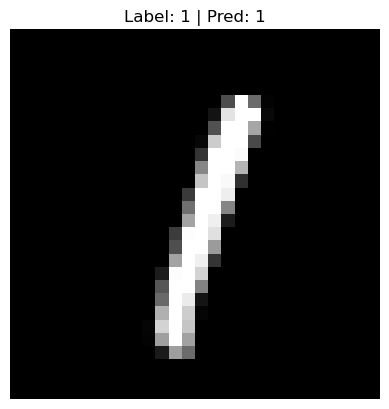

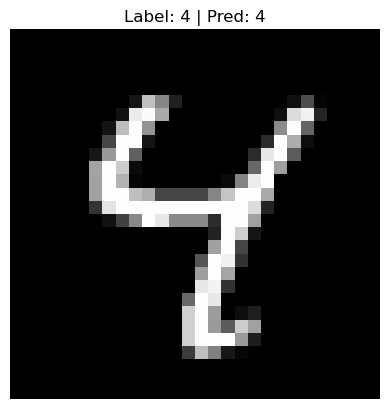

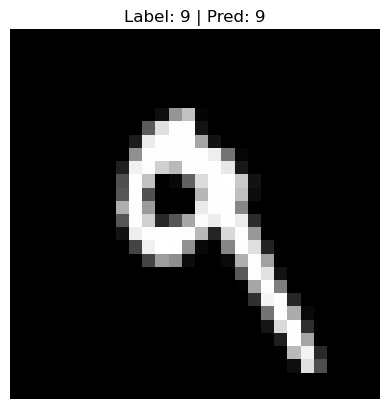

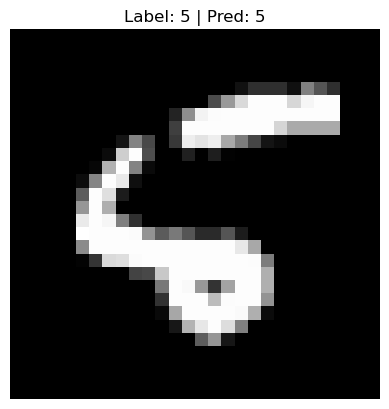

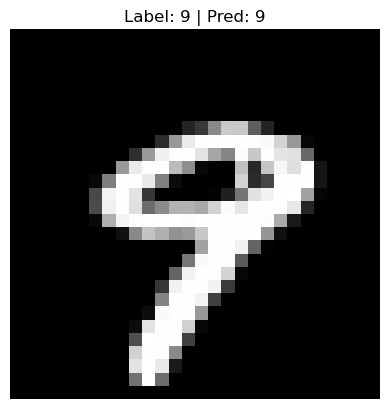

In [11]:
examples = iter(test_loader)
images, labels = next(examples)

with torch.no_grad():
    outputs = model(images.to(device))
    _, predicted = torch.max(outputs, 1)

for i in range(10):
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]} | Pred: {predicted[i].item()}")
    plt.axis('off')
    plt.show()